In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [4]:
import pandas as pd
  
Corpus = pd.read_csv('/content/books_data (1).csv')
print(Corpus)

     Unnamed: 0 Author                                               Text
0             0      a  the next second he had raised the surprised Fi...
1             1      a  “You’re too young to be a brigadier-general, a...
2             2      a  Kapay. He was scarcely older than Phil, and ye...
3             3      a  we had in the dago country and up with them pi...
4             4      a  now being idly collected. Into these spacious ...
..          ...    ...                                                ...
995         995      e  Illustrated. 12mo. Cloth, $1.50.CHRISTINE'S CA...
996         996      e  to pour in, at first in tens and then in hundr...
997         997      e  singular one."Until the shocks of the volcanoe...
998         998      e  islands only appeared in the months of steady ...
999         999      e  which is illustrated by a very curious anecdot...

[1000 rows x 3 columns]


In [5]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])
#df.drop(columns=['B', 'C'])

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = Corpus['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [8]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not in stopwords.words('english')]

In [9]:
X = Corpus['Text']

In [10]:
print(X)

0      the next second he had raised the surprised Fi...
1      “You’re too young to be a brigadier-general, a...
2      Kapay. He was scarcely older than Phil, and ye...
3      we had in the dago country and up with them pi...
4      now being idly collected. Into these spacious ...
                             ...                        
995    Illustrated. 12mo. Cloth, $1.50.CHRISTINE'S CA...
996    to pour in, at first in tens and then in hundr...
997    singular one."Until the shocks of the volcanoe...
998    islands only appeared in the months of steady ...
999    which is illustrated by a very curious anecdot...
Name: Text, Length: 1000, dtype: object


the next second he had raised the surprised Filipino from off his seat and held him for an instant balanced in the air.“Turn her down-stream,” the midshipman ordered in a hoarse voice, as he flung the struggling man into the water clear of the rocking boat.Maria by a well-timed stroke had instantly spun the canoe about, and all four bent desperately to their paddles. Phil saw the broad-brimmed sombrero of their enemy floating on the surface and a fear instantly filled his thoughts that Salas might not swim. The next second he was reassured; the head of the[226] native covered with thick black hair could be plainly seen swimming toward the far shore; the menacing presence of the crocodile had deterred him from attempting to reach the land but a few strokes away. Every second the lad expected to hear a loud call for help from the outraged officer. Phil,
a


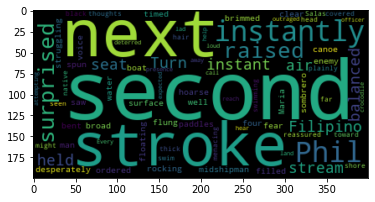

“You’re too young to be a brigadier-general, although you’ve got a star there on your shoulder-strap.”Phil smiled.[166]“Yes, sentry, I am Captain Perry of the gunboat.”“Sure, sir, you can pass me, any time,” the soldier exclaimed gladly. “That was certainly great work you done in Binalbagan. All the boys is talking about you two officers and Jack O’Neil. I’d like to meet him; he must be a corker.” The sentry had grounded his rifle and now stood at ease talking sociably, very much at home with the young midshipman.“He is here,” Phil replied. “If I may pass my party, I’ll call him.”“Certainly, captain, anything you say goes with me,” the sentry returned enthusiastically.The carriage, followed by the band of a dozen natives, drove down the street away from the city. Phil caught a wave of a hand from the window as he turned and started for the gunboat and his bunk,
a


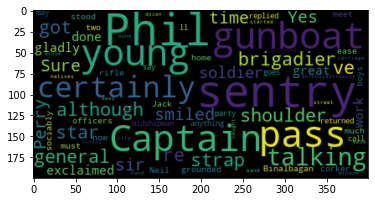

we had in the dago country and up with them pigtailed chinks.”The midshipmen slapped the loquacious sailor joyfully on the back.[14]“You’re not half as glad to be with us as we are to have you,” Phil exclaimed frankly. “We’re just aching for something worth while—we’ve been roasting up on the Yangtse River since you left us, doing nothing except watch the grass burn up and the water in the river fall. I never felt such heat.”While the Americans were talking the little steamer slipped noisily down the busy river and out on the bay made famous by Admiral Dewey on that memorable May morning.Corregidor Island lifted itself slowly out of a molten sea to the westward. The “Negros’” bow was pointed out through the southern channel, passing close to the precipitous island, standing like an unbending sentinel on guard between the wide portals of the Bay of Manila.“A few guns
a


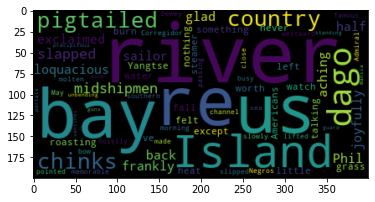

In [11]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = Corpus['Text']
wordcloud1 = WordCloud().generate(X[0])
wordcloud2 = WordCloud().generate(X[1]) 
wordcloud3 = WordCloud().generate(X[3]) 
print(X[0])
print(Corpus['Author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(Corpus['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(Corpus['Author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [12]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train=X
# defining the bag-of-words transformer on the text-processed corpus
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
# transforming into Bag-of-Words
text_bow=bow_transformer.transform(X_train)

In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text_bow)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.04


In [14]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# n_components = np.arange(1, 21)
# models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_svd) for n in n_components]
# plt.plot(n_components, [m.bic(text.toarray()) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(text.toarray()) for m in models], label='AIC')
# plt.legend(loc='best')
# plt.xlabel('n_components');

In [15]:
from sklearn.metrics import silhouette_score

for i in [2, 3, 4, 5,6,8]:
    gmm = GaussianMixture(n_components=5)
    labels=gmm.fit_predict(X_svd, y)
    score = silhouette_score(X_svd, labels, metric='euclidean')
    print("silhouette coefficient for {} clusters", score)
    

silhouette coefficient for {} clusters 0.3377578739915782
silhouette coefficient for {} clusters 0.3674907377449476
silhouette coefficient for {} clusters 0.3701495996310772
silhouette coefficient for {} clusters 0.37086998795609044
silhouette coefficient for {} clusters 0.37086998795609044
silhouette coefficient for {} clusters 0.3701495996310772


array([[3.68280914e-01, 6.08867169e-03, 1.31163545e-06, 5.77776742e-01,
        4.78523613e-02],
       [7.34761388e-01, 3.54972963e-03, 2.90758722e-05, 3.23783043e-03,
        2.58421976e-01],
       [1.55397932e-01, 4.18395023e-03, 3.25508510e-07, 8.25630739e-01,
        1.47870536e-02],
       ...,
       [5.53127962e-02, 3.34206690e-03, 8.79234884e-08, 9.36486659e-01,
        4.85839026e-03],
       [7.42436702e-01, 3.59155578e-03, 4.76003505e-06, 1.46887937e-01,
        1.07079046e-01],
       [7.80814182e-01, 1.08574068e-02, 2.24318640e-06, 1.84943753e-01,
        2.33824148e-02]])

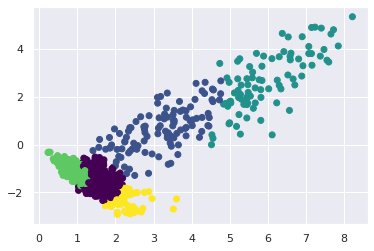

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder1= LabelEncoder()
authors = labelencoder1.fit_transform(Corpus['Author'])

gmm = GaussianMixture(n_components=5)
#gmm.fit(X_svd)

#labels = gmm.predict(X_svd)
labels=gmm.fit_predict(X_svd, y)

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis');

gmm.predict_proba(X_svd)

In [17]:
len(X_svd[0])

2

In [18]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y, labels)

0.27249999999999996

In [27]:
score = silhouette_score(X_svd, labels, metric='euclidean')
print("silhouette coefficient", score)

silhouette coefficient 0.3389741350454976


In [19]:
Corpus['cluster'] = labels

In [20]:
Corpus['A1']=y

In [21]:
Corpus

,Author,Text,cluster,A1
0,a,the next second he had raised the surprised Fi...,3,0
1,a,"“You’re too young to be a brigadier-general, a...",0,0
2,a,"Kapay. He was scarcely older than Phil, and ye...",3,0
3,a,we had in the dago country and up with them pi...,3,0
4,a,now being idly collected. Into these spacious ...,3,0
...,...,...,...,...
995,e,"Illustrated. 12mo. Cloth, $1.50.CHRISTINE'S CA...",3,4
996,e,"to pour in, at first in tens and then in hundr...",3,4
997,e,"singular one.""Until the shocks of the volcanoe...",3,4
998,e,islands only appeared in the months of steady ...,0,4


In [22]:
c=0
for i in range(0,999):
  if(Corpus['cluster'][i]!=Corpus['A1'][i]):
    c+=1
    print("Author: ",Corpus['A1'][i],"Cluster: ",Corpus['cluster'][i])
    # wordcloud1 = WordCloud().generate(Corpus['Text'][i])
    # plt.imshow(wordcloud1, interpolation='bilinear')
    # plt.show()

    

Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  4
Author:  0 Cluster:  4
Author:  0 Cluster:  3
Author:  0 Cluster:  3
Author:  0 

In [23]:
Corpus

,Author,Text,cluster,A1
0,a,the next second he had raised the surprised Fi...,3,0
1,a,"“You’re too young to be a brigadier-general, a...",0,0
2,a,"Kapay. He was scarcely older than Phil, and ye...",3,0
3,a,we had in the dago country and up with them pi...,3,0
4,a,now being idly collected. Into these spacious ...,3,0
...,...,...,...,...
995,e,"Illustrated. 12mo. Cloth, $1.50.CHRISTINE'S CA...",3,4
996,e,"to pour in, at first in tens and then in hundr...",3,4
997,e,"singular one.""Until the shocks of the volcanoe...",3,4
998,e,islands only appeared in the months of steady ...,0,4


In [24]:
# for i in range(999,990,-1):
#   if(Corpus['cluster'][i]!=Corpus['A1'][i]):
#     print("Author: ",Corpus['A1'][i],"Cluster: ",Corpus['cluster'][i])
#     wordcloud1 = WordCloud().generate(Corpus['Text'][i])
#     plt.imshow(wordcloud1, interpolation='bilinear')
#     plt.show()

In [25]:
c=0
for i in range(0,999):
  if(Corpus['A1'][i]!=Corpus['cluster'][i]):
    c+=1
print(c)

581
